### Загружаем библеотеки и настраиваем

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pylab import rcParams

%matplotlib inline
%config Inlinebackend.figure_format = 'svg'

import warnings

warnings.filterwarnings('ignore')

### Читаем данные и просматриваем информацию

In [2]:
PATH = 'opendata.csv'
df = pd.read_csv(PATH, encoding='windows-1251')
print(df.head())
df.info()

                                           name  region        date   value
0  Количество заявок на потребительские кредиты  Россия  2013-01-15  571147
1  Количество заявок на потребительские кредиты  Россия  2013-02-15  504508
2  Количество заявок на потребительские кредиты  Россия  2013-03-15  628803
3  Количество заявок на потребительские кредиты  Россия  2013-04-15  836054
4  Количество заявок на потребительские кредиты  Россия  2013-05-15  867235
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74842 entries, 0 to 74841
Data columns (total 4 columns):
name      74842 non-null object
region    74842 non-null object
date      74842 non-null object
value     74842 non-null int64
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


### Обзываем остальные столбцы

In [3]:
names = df['name']
regions = df['region']
dates = df['date']
values = df['value']

### Просматриваем типы данных

In [4]:
i = 0
for name in names.unique():
    print(f'{i}\t{name}')
    i += 1
len(names.unique())

0	Количество заявок на потребительские кредиты
1	Средняя сумма заявки на потребительский кредит
2	Количество заявок на ипотечные кредиты
3	Средняя сумма заявки на ипотечный кредит
4	Количество новых депозитов
5	Средняя сумма нового депозита
6	Средняя зарплата
7	Средняя пенсия
8	В среднем руб. на текущем счете на человека
9	В среднем депозитов в руб. на человека
10	Средние расходы по картам
11	Средний чек в формате Фастфуд
12	Средний чек в формате Ресторан
13	Средние траты в ресторане фастфуд
14	Средние траты в ресторане


15

### Просматриваем регионы

In [5]:
i = 0
for region in regions.unique():
    print(f'{i}\t{region}')
    i += 1
len(regions.unique())

0	Россия
1	Алтайский край
2	Амурская область
3	Архангельская область
4	Астраханская область
5	Белгородская область
6	Брянская область
7	Владимирская область
8	Волгоградская область
9	Вологодская область
10	Воронежская область
11	Еврейская автономная область
12	Забайкальский край
13	Ивановская область
14	Иркутская область
15	Кабардино-Балкарская Республика
16	Калининградская область
17	Калужская область
18	Камчатский край
19	Кемеровская область
20	Кировская область
21	Костромская область
22	Краснодарский край
23	Красноярский край
24	Курганская область
25	Курская область
26	Ленинградская область
27	Липецкая область
28	Магаданская область
29	Москва
30	Московская область
31	Мурманская область
32	Ненецкий автономный округ
33	Нижегородская область
34	Новгородская область
35	Новосибирская область
36	Омская область
37	Оренбургская область
38	Орловская область
39	Пензенская область
40	Пермский край
41	Приморский край
42	Псковская область
43	Республика Адыгея
44	Республика Алтай (Горный Алтай)
4

84

### Вводим данные

In [6]:
region = int(input('Введите индекс региона: '))
name = int(input('Введите индекс данных: '))
print('Введите временной интервал в формате ГГГГ-ММ-ДД')
date = [input('от: '), input('до: ')]

Введите индекс региона: 31
Введите индекс данных: 6
Введите временной интервал в формате ГГГГ-ММ-ДД
от: 2014-01-01
до: 2019-01-01


### Принимаем и просматриваем данные

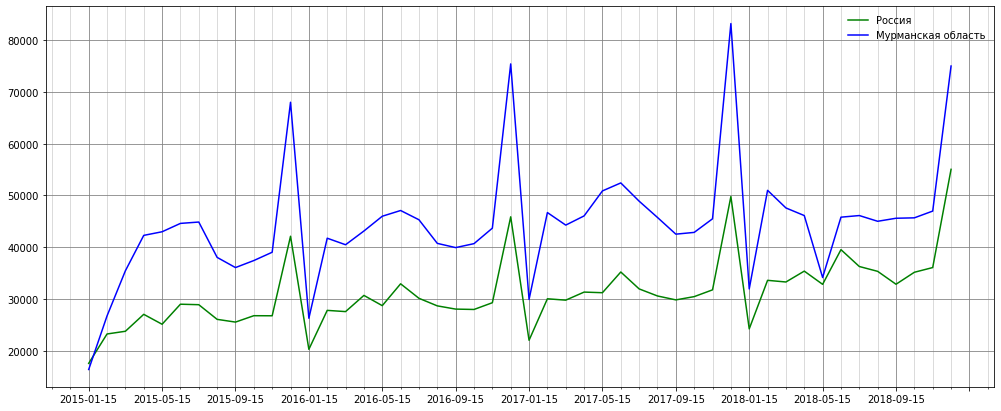

,name,region,date,value
35957,Средняя зарплата,Мурманская область,2015-01-15,16453
35958,Средняя зарплата,Мурманская область,2015-02-15,26782
35959,Средняя зарплата,Мурманская область,2015-03-15,35482
35960,Средняя зарплата,Мурманская область,2015-04-15,42306
35961,Средняя зарплата,Мурманская область,2015-05-15,43003


In [7]:
comparicon = df[
    (names == names.unique()[name]) & 
    (regions == regions.unique()[0]) & 
    (dates > date[0]) &
    (dates < date[1])
] # Россия

name_region = df[
    (names == names.unique()[name]) & 
    (regions == regions.unique()[region]) & 
    (dates > date[0]) &
    (dates < date[1])
] # Область

rcParams['figure.figsize'] = 17, 7
plt.plot(comparicon['date'], comparicon['value'], color='green', label=regions.unique()[0])
plt.plot(name_region['date'], name_region['value'], color='blue', label=regions.unique()[region])

# рисуем основные линии и определяем интервал
ax = plt.subplot()
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax.grid(
    which='major',
    color='gray'
)

# рисуем вспомогательные линии и определяем интервал
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.legend(frameon=False)
plt.grid(
    which='minor',
    color='lightgray'
)

plt.show()
name_region.head()